In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import scipy.optimize as scopt
import glob
import os

%matplotlib inline

In [3]:
def load_json(file):
    '''
    Loads txt file and returns dataframe using the json dict
    '''
    data = {}
    with open(file, encoding='utf-8') as f:
        for line in f:
            d = str(line).replace("'", '"')
            data = json.loads(d)

    return pd.DataFrame(data)

In [12]:
os.chdir(os.getcwd())
files = [file for file in glob.glob("*.txt")]
dfs = [load_json(file) for file in files]
data = pd.concat(dfs)
data['rss'] = pd.to_numeric(data['rss'])

In [13]:
x1, y1 = (6.8, 6.8)
x2, y2 = (-.87, 9.45)

In [14]:
set(data.mac)

{'8c:85:90:16:0a:a4',
 'ac:9e:17:7d:31:e8',
 'd8:c4:6a:50:e3:b1',
 'f8:cf:c5:97:e0:9e'}

In [69]:
t1 = data[data['mac'] == '8c:85:90:16:0a:a4']
t2 = data[data['mac'] == 'ac:9e:17:7d:31:e8']
t3 = data[data['mac'] == 'd8:c4:6a:50:e3:b1']
t4 = data[data['mac'] == 'f8:cf:c5:97:e0:9e']

In [29]:
def localization(coords, c, g, x0, y0):
    x1, y1 = coords
    return c + g * np.log10(((x1-x0)**2 + (y1-y0)**2)**0.5)

In [71]:
scopt.curve_fit(localization,
                (t1.loc_x,t1.loc_y),
                t1.rss,
                maxfev=30000,
                bounds=((-60,2,-20,-20),(30,6,20,20)))

(array([-58.04559234,   6.        ,  -0.91649324,   7.18174917]),
 array([[ 0.10863266, -0.10763232,  0.06133638,  0.03091975],
        [-0.10763232,  0.10789308, -0.05996016, -0.02938578],
        [ 0.06133638, -0.05996016,  0.03617075,  0.01998236],
        [ 0.03091975, -0.02938578,  0.01998236,  0.01415306]]))

In [68]:
scopt.curve_fit(localization,
                (t2.loc_x,t2.loc_y),
                t2.rss,
                maxfev=30000,
                bounds=((-60,2,-20,-20),(30,6,20,20)))

(array([-53.19515604,   6.        ,   6.48825705,   3.78141614]),
 array([[  2.84835439e-04,  -3.65538235e-04,  -3.21079936e-05,
           2.56787778e-06],
        [ -3.65538235e-04,   7.67270453e-04,   5.11477626e-05,
           2.85676804e-06],
        [ -3.21079936e-05,   5.11477626e-05,   1.10103379e-05,
          -8.98259393e-07],
        [  2.56787778e-06,   2.85676804e-06,  -8.98259393e-07,
           7.62241171e-06]]))

In [70]:
scopt.curve_fit(localization,
                (t3.loc_x,t3.loc_y),
                t3.rss,
                maxfev=30000,
                bounds=((-60,2,-20,-20),(30,6,20,20)))

(array([-60.        ,   3.86800042,   6.41979165,   4.651882  ]),
 array([[  1.11074524e-02,  -1.48943352e-02,  -6.39260834e-04,
           2.28400211e-04],
        [ -1.48943352e-02,   3.04971153e-02,   8.97826358e-04,
          -3.39363815e-04],
        [ -6.39260834e-04,   8.97826358e-04,   4.79203758e-04,
          -1.41329496e-04],
        [  2.28400211e-04,  -3.39363815e-04,  -1.41329496e-04,
           4.56025394e-05]]))

In [72]:
scopt.curve_fit(localization,
                (t4.loc_x,t4.loc_y),
                t4.rss,
                maxfev=30000,
                bounds=((-60,2,-20,-20),(30,6,20,20)))

(array([-60.        ,   2.        ,   4.66652953,   6.78223933]),
 array([[  6.62296722e-03,  -5.20772586e-03,  -2.54796303e-05,
           8.49490049e-05],
        [ -5.20772586e-03,   2.56470133e-02,   1.03921824e-04,
          -3.04199852e-04],
        [ -2.54796303e-05,   1.03921824e-04,   7.37007676e-05,
          -1.89658408e-06],
        [  8.49490049e-05,  -3.04199852e-04,  -1.89658408e-06,
           4.21248316e-05]]))

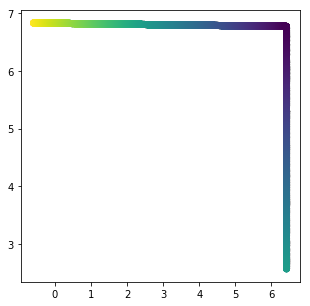

In [36]:
plt.figure(1, figsize=(5,5))
plt.scatter(data['loc_x'],data['loc_y'],c=data['d1'])
plt.show()

In [38]:
np.polyfit(data['d1_log'], data['rss'], 1)
# rss = 7.0311 - 53.6528 * log(distance)
# distance = 10**((rss - 7.0311)/(-53.6528))

array([  7.03114046, -53.65280988])

In [39]:
scopt.curve_fit(lambda t,a,b: a + b * np.log10(t),\
                data['d2'],  data['rss'])

(array([-32.30021236, -24.96108957]), array([[ 0.01695739, -0.02186846],
        [-0.02186846,  0.02992395]]))